In [ ]:
import kagglehub


path = kagglehub.dataset_download("manjilkarki/deepfake-and-real-images")

print("Path to dataset files:", path)

In [ ]:
!pip install -q gdown


In [ ]:
!gdown --folder --remaining-ok https://drive.google.com/drive/folders/1RqVsOZe_khPAg89PMsWJL5lO70zrX6kr


Retrieving folder contents
Processing file 147R0g9bohsuQbb7W55YUCTey9ERypHkz 0.mp4
Processing file 1irBEsfzrCTongpm0yUDh-V8UXjVhDE51 1.mp4
Processing file 1vjNNXPd8_OeyXjt2EyUhkdNLaAgQbMxi 2.mp4
Processing file 1FtKHLoP_OsXqRtHG0Wwdbr-9ZnQn8tf8 3.mp4
Processing file 17TQVWhR4h1nRDocyclprM2xRQyyn-wlh 4.mp4
Processing file 1f4ih8XEfo6FuD-XWwX86P4BjG9UmF6tq 5.mp4
Processing file 1S3MesXkhL6bAsBLbIKz7bAT4KkqDEDQZ 6.mp4
Processing file 1SEel8ylubS4OUqBkpLs7MzEEQ7Y17_bi 7.mp4
Processing file 1BvlCuIZxOPy8ZS3_wICLv6pmRz-F3Tce 8.mp4
Processing file 1qaVFOmbUQTFCwt-8PIdO6x3mdWzPvCLi 9.mp4
Processing file 1JoYNFip8vE-hDWHkYWJv7vPEuuM8aOQP 10.mp4
Processing file 1VUSxITN-DSnXHVV-7PAxgsZ96tH4BlY2 11.mp4
Processing file 1VmlZ0zi3nJJxk42ws0v60nR5LpkkWxZr 12.mp4
Processing file 1uQSNrOFI5DQH2qUmgDo186fj-bpbHWAj 13.mp4
Processing file 1BiQkZKR4EY72utEkdTj4vpydfpDBu3rA 14.mp4
Processing file 1VBSwqzHk6J9pcGOUuRNP2CTVoKpv1gog 15.mp4
Processing file 1eI5gUlrpQc1R_o8XHy0kJFnkztZKJMi4 16.mp4
Processing fil

In [ ]:
import os

video_extensions = (".mp4", ".avi", ".mov", ".mkv", ".flv")
videos = []

for root, dirs, files in os.walk("."):
    for file in files:
        if file.lower().endswith(video_extensions):
            videos.append(os.path.join(root, file))

videos


['./dfw_youtube_release/39.mp4',
 './dfw_youtube_release/14.mp4',
 './dfw_youtube_release/43.mp4',
 './dfw_youtube_release/10.mp4',
 './dfw_youtube_release/29.mp4',
 './dfw_youtube_release/47.mp4',
 './dfw_youtube_release/7.mp4',
 './dfw_youtube_release/11.mp4',
 './dfw_youtube_release/28.mp4',
 './dfw_youtube_release/32.mp4',
 './dfw_youtube_release/2.mp4',
 './dfw_youtube_release/5.mp4',
 './dfw_youtube_release/45.mp4',
 './dfw_youtube_release/46.mp4',
 './dfw_youtube_release/33.mp4',
 './dfw_youtube_release/27.mp4',
 './dfw_youtube_release/1.mp4',
 './dfw_youtube_release/19.mp4',
 './dfw_youtube_release/18.mp4',
 './dfw_youtube_release/20.mp4',
 './dfw_youtube_release/24.mp4',
 './dfw_youtube_release/21.mp4',
 './dfw_youtube_release/22.mp4',
 './dfw_youtube_release/23.mp4',
 './dfw_youtube_release/30.mp4',
 './dfw_youtube_release/13.mp4',
 './dfw_youtube_release/36.mp4',
 './dfw_youtube_release/26.mp4',
 './dfw_youtube_release/44.mp4',
 './dfw_youtube_release/49.mp4',
 './dfw_youtub

In [ ]:
!ls

dfw_youtube_release  sample_data


In [ ]:
VIDEO_DIR = "/content/dfw_youtube_release"


import glob
import numpy as np
import cv2

video_files = glob.glob(f"{VIDEO_DIR}/*.mp4")

valid_videos = []
frame_counts = []

for video_file in video_files:
    cap = cv2.VideoCapture(video_file)

    if not cap.isOpened():
        cap.release()
        continue

    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()

    if frames >= 150:
        valid_videos.append(video_file)
        frame_counts.append(frames)

print("Frame counts:", frame_counts)
print("Total valid videos:", len(valid_videos))
print("Average frames per video:", np.mean(frame_counts))



Frame counts: [833, 2411, 987, 2987, 400, 1791, 3040, 2602, 419, 610, 2726, 2575, 1320, 982, 876, 1812, 2993, 3664, 1685, 5604, 1538, 3764, 399, 960, 1276, 617, 593, 260, 1048, 3021, 274, 3994, 2279, 4981, 683, 2014, 245, 2426, 923, 1770, 960, 4339, 629, 3023, 682, 4347, 286, 3697, 988, 418]
Total valid videos: 50
Average frames per video: 1855.02


In [ ]:
!pip install -q pydrive2


In [ ]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = auth.get_application_default()
drive = GoogleDrive(gauth)


AttributeError: module 'google.colab.auth' has no attribute 'get_application_default'

In [ ]:
import numpy as np
import pandas as pd
from keras.applications import ResNet50
import os
from sklearn.metrics import roc_curve, roc_auc_score
import cv2
import matplotlib.pyplot as plt
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow import keras
import tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,BatchNormalization,GlobalAveragePooling2D,Dropout,MaxPooling2D,Attention,Conv2D,concatenate
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications import Xception,VGG16,VGG19,MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Layer, MultiHeadAttention
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, LeakyReLU
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
train_path="/kaggle/input/deepfake-and-real-images/Dataset/Train"
test_path="/kaggle/input/deepfake-and-real-images/Dataset/Test"
val_path="/kaggle/input/deepfake-and-real-images/Dataset/Validation"

In [ ]:
import os
import cv2

def FrameCapture(path):

    vidObj = cv2.VideoCapture(path)


    count = 0

    success = 1

    if not os.path.exists("frames"):
        os.makedirs("frames")

    while success:


        success, image = vidObj.read()


        if not success:
            break


        frames_num = 20
        if count % frames_num == 0:
            cv2.imwrite("frames/frame%d.jpg" % (count), image)

        count += 1


In [ ]:
FrameCapture("/kaggle/input/test-video")

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255.0)


training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

val_set = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 140002 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import LSTM, TimeDistributed

from tensorflow.keras.layers import Reshape
lstm_units = 64


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
cnn_output = Dense(16, activation='relu')(x)


reshaped_cnn_output = Reshape((1, 16))(cnn_output)


lstm_layer = LSTM(units=lstm_units)


lstm_output = lstm_layer(reshaped_cnn_output)


predictions = Dense(1, activation='sigmoid')(lstm_output)


combined_model = Model(inputs=base_model.input, outputs=predictions)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
combined_model.summary()

In [ ]:
# Test for this
for layer in base_model.layers:
    layer.trainable = False


learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)
combined_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
combined_model.compile(optimizer=optimizer, loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
with tf.device('/GPU:1'):
    history = combined_model.fit(
        training_set,
        epochs=15,
        validation_data=val_set
    )


Epoch 1/15
2188/2188 [==============================] - 2675s 1s/step - loss: 0.6871 - accuracy: 0.5517 - val_loss: 0.6885 - val_accuracy: 0.5490
Epoch 2/15
2188/2188 [==============================] - 1909s 872ms/step - loss: 0.6757 - accuracy: 0.5783 - val_loss: 0.6805 - val_accuracy: 0.5672
Epoch 3/15
2188/2188 [==============================] - 1920s 878ms/step - loss: 0.6696 - accuracy: 0.5906 - val_loss: 0.6697 - val_accuracy: 0.5934
Epoch 4/15
2188/2188 [==============================] - 1937s 885ms/step - loss: 0.6640 - accuracy: 0.6025 - val_loss: 0.6665 - val_accuracy: 0.5904
Epoch 5/15
2188/2188 [==============================] - 1976s 903ms/step - loss: 0.6619 - accuracy: 0.6053 - val_loss: 0.6662 - val_accuracy: 0.5870
Epoch 6/15
2188/2188 [==============================] - 1948s 890ms/step - loss: 0.6606 - accuracy: 0.6073 - val_loss: 0.6539 - val_accuracy: 0.6195
Epoch 7/15
2188/2188 [==============================] - 1964s 898ms/step - loss: 0.6593 - accuracy: 0.6092 - 

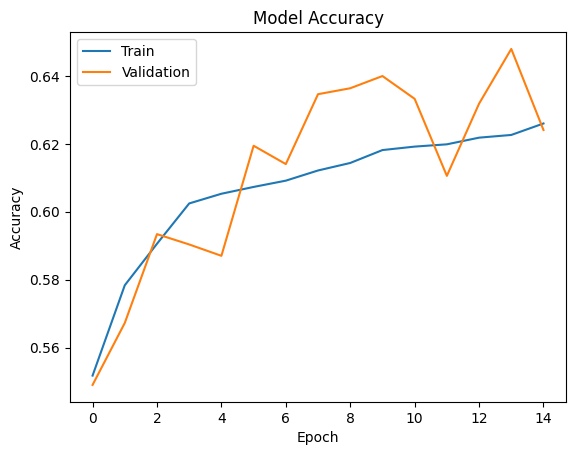

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

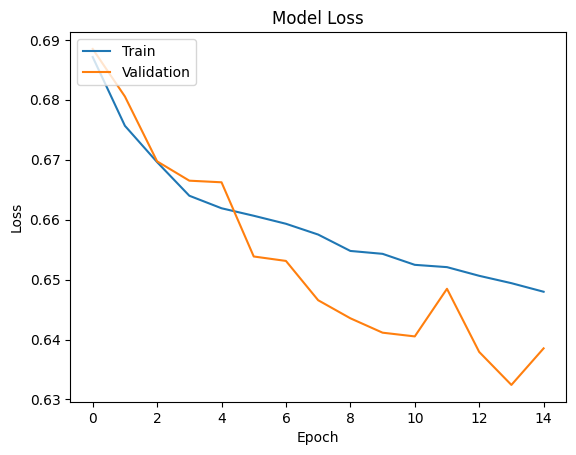

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:

test_pred = combined_model.predict(test_set)
test_pred_classes = np.round(test_pred)


test_true_classes = test_set.classes

341/341 [==============================] - 73s 211ms/step


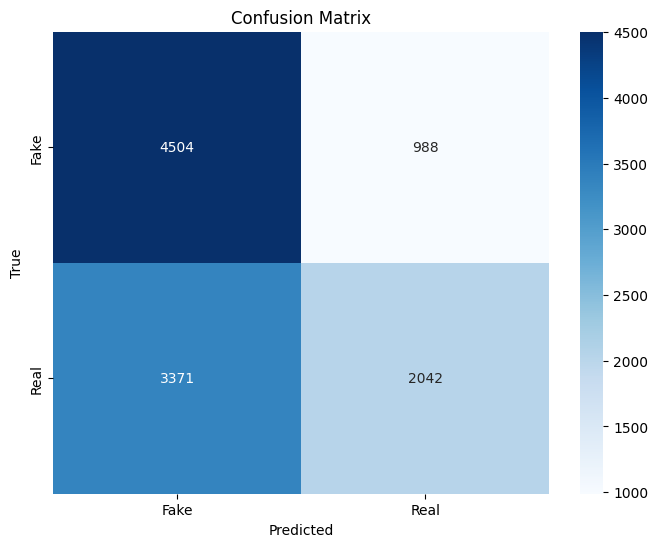

In [ ]:

cm = confusion_matrix(test_true_classes, test_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_set.class_indices.keys(),
            yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
evaluation = combined_model.evaluate(test_set)

341/341 [==============================] - 22s 65ms/step - loss: 0.6723 - accuracy: 0.6003


In [ ]:
print("Test Accuracy: {:.2f}%".format(evaluation[1] * 100))

Test Accuracy: 60.03%


In [ ]:

report = classification_report(test_true_classes, test_pred_classes, target_names=["Class 0", "Class 1"], labels=[0, 1], digits=4)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Class 0     0.5719    0.8201    0.6739      5492
     Class 1     0.6739    0.3772    0.4837      5413

    accuracy                         0.6003     10905
   macro avg     0.6229    0.5987    0.5788     10905
weighted avg     0.6226    0.6003    0.5795     10905



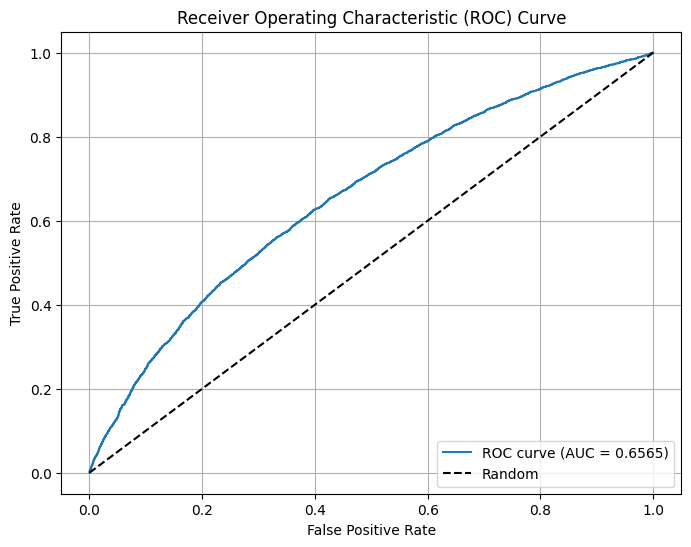

In [ ]:

fpr, tpr, thresholds = roc_curve(test_true_classes, test_pred)


auc = roc_auc_score(test_true_classes, test_pred)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.4f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

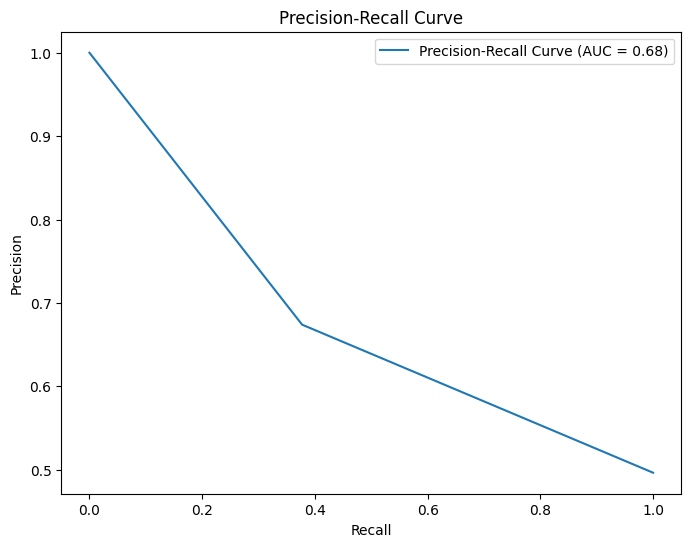

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = precision_recall_curve(test_true_classes, test_pred_classes)


auc_pr = auc(recall, precision)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:

tn, fp, fn, tp = confusion_matrix(test_true_classes, test_pred_classes).ravel()


sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Sensitivity (True Positive Rate): {sensitivity:.4f}')
print(f'Specificity (True Negative Rate): {specificity:.4f}')

Sensitivity (True Positive Rate): 0.3772
Specificity (True Negative Rate): 0.8201


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix


f1 = f1_score(test_true_classes, test_pred_classes)

accuracy = accuracy_score(test_true_classes, test_pred_classes)
error_rate = 1 - accuracy

g_mean = (sensitivity * specificity) ** 0.5


f_measure = 2 * ((sensitivity * specificity) / (sensitivity + specificity))

print(f'F1 Score: {f1:.4f}')
print(f'Error Rate: {error_rate:.4f}')
print(f'G-mean: {g_mean:.4f}')
print(f'F-measure: {f_measure:.4f}')

F1 Score: 0.4837
Error Rate: 0.3997
G-mean: 0.5562
F-measure: 0.5168


In [ ]:
import requests
from PIL import Image
from io import BytesIO

image_url = "https://cdn.britannica.com/86/182086-050-5FB81069/singer-Taylor-swift-2013.jpg"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))


In [ ]:
img

In [ ]:
img = img.resize((224, 224))  # Adjust size according to your model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values


In [ ]:
prediction = combined_model.predict(img_array)
if prediction[0][0] >= 0.5:
    print("The image is predicted as a deepfake.")
else:
    print("The image is predicted as real.")


1/1 [==============================] - 2s 2s/step
The image is predicted as real.


In [ ]:
# Save the model
model_save_path = "deepfake_detection_model.h5"
combined_model.save(model_save_path)
print("Model saved at:", model_save_path)


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at: deepfake_detection_model.h5


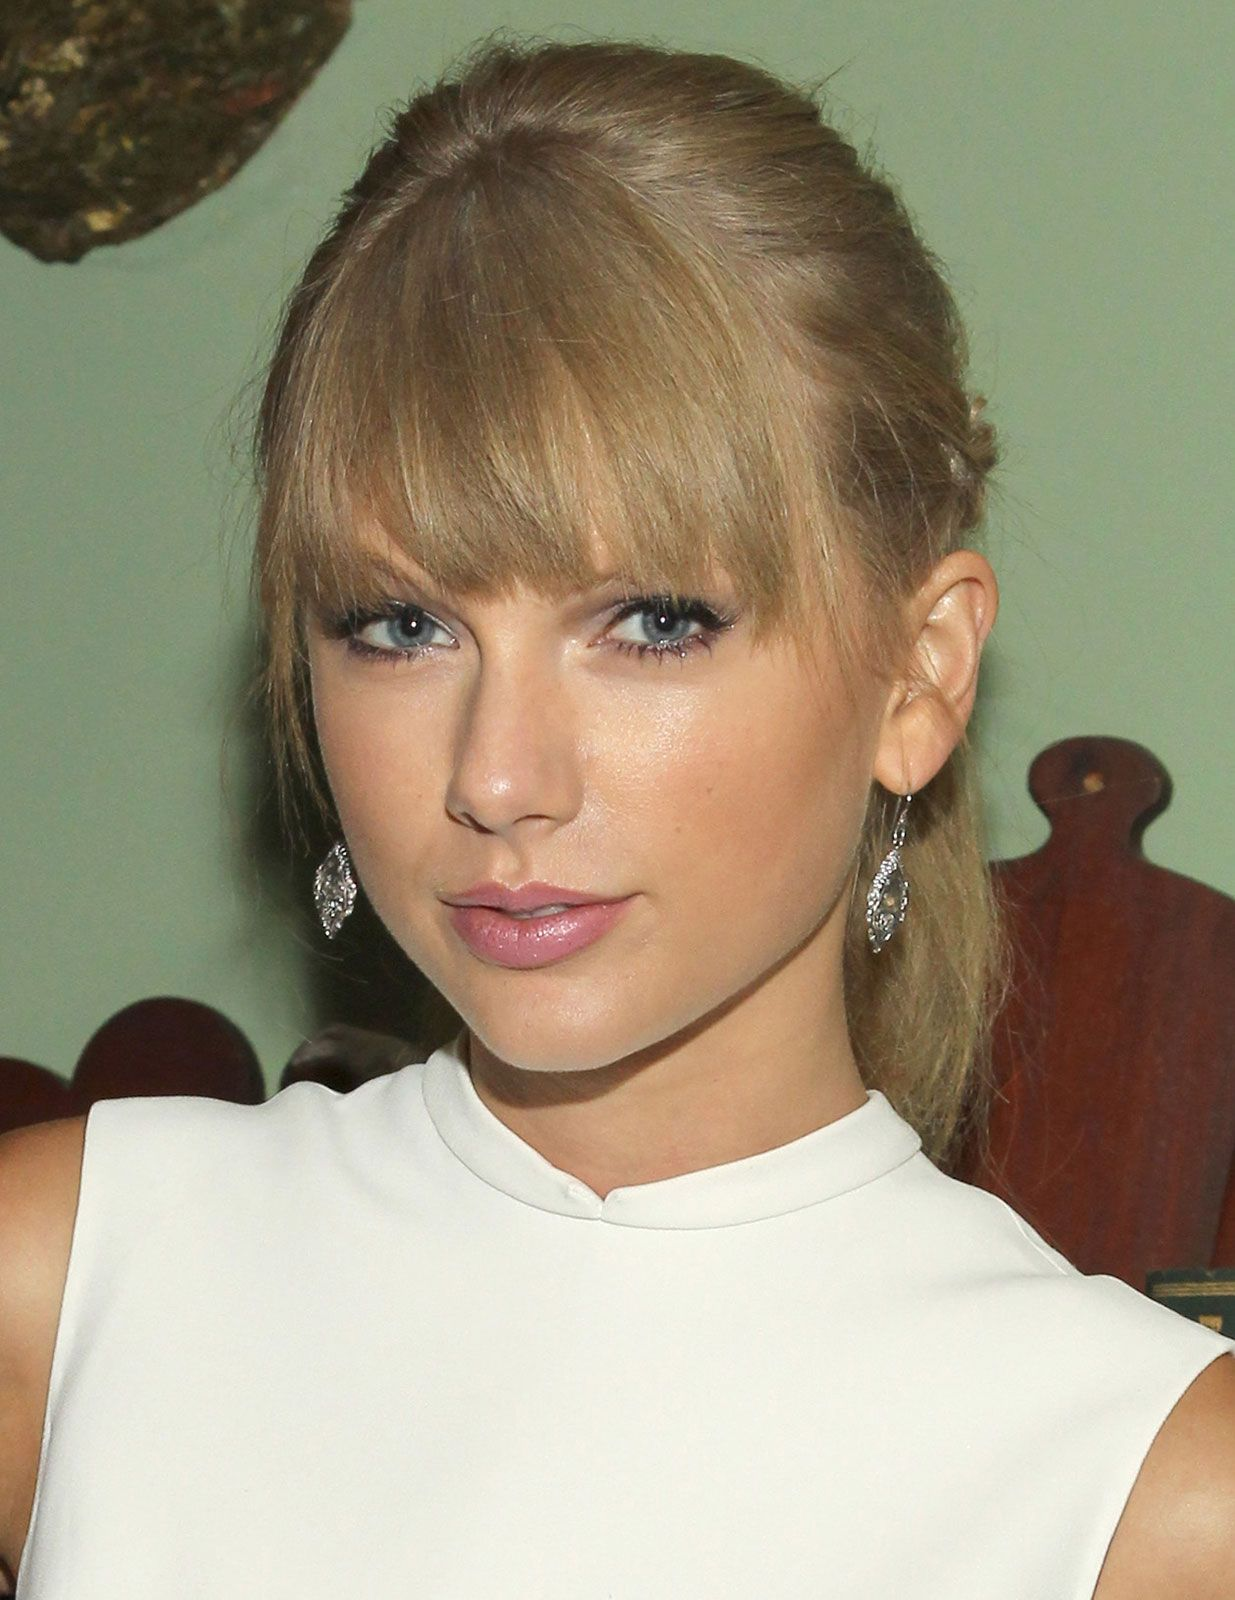

In [ ]:
import glob
import torch
import torchvision
from torchvision import transforms
import os
import numpy as np
import cv2
import face_recognition
from PIL import Image

# ---------- GOOD FRAME CHECKS ----------

def is_blurry(frame, threshold=100):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    lap = cv2.Laplacian(gray, cv2.CV_64F).var()
    return lap < threshold  # True = blurry

def is_too_dark(frame, threshold=40):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    return gray.mean() < threshold

def contains_face(frame):
    faces = face_recognition.face_locations(frame)
    return len(faces) > 0

def is_good_frame(frame):
    if frame is None or frame.size == 0:
        return False

    if not contains_face(frame):
        return False

    if is_blurry(frame):
        return False

    if is_too_dark(frame):
        return False

    return True


# ---------- FRAME GENERATOR ----------

def frame_extract(path):
    vidObj = cv2.VideoCapture(path)
    success = True

    while success:
        success, image = vidObj.read()
        if success and image is not None:
            yield image


# ---------- VALIDATE VIDEO & EXTRACT 20 GOOD FRAMES ----------

def validate_video(vid_path, train_transforms, required_frames=20):
    good_frames = []
    video_path = vid_path

    for frame in frame_extract(video_path):
        # Check if this frame is "GOOD"
        if is_good_frame(frame):
            # Apply transforms
            transformed = train_transforms(frame)
            good_frames.append(transformed)

        # Stop if we collected enough
        if len(good_frames) == required_frames:
            break

    # If insufficient good frames → video is corrupted
    if len(good_frames) < required_frames:
        raise ValueError(f"Not enough good frames. Found only {len(good_frames)}")

    # Stack as tensor
    good_frames = torch.stack(good_frames)
    return good_frames



# ---------- TRANSFORMS ----------

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


# ---------- LOAD VIDEOS ----------

video_fil = []
video_fil += glob.glob('/content/drive/My Drive/Celeb_fake_face_only/*.mp4')
video_fil += glob.glob('/content/drive/My Drive/Celeb_real_face_only/*.mp4')
video_fil += glob.glob('/content/drive/My Drive/DFDC_FAKE_Face_only_data/*.mp4')
video_fil += glob.glob('/content/drive/My Drive/DFDC_REAL_Face_only_data/*.mp4')
video_fil += glob.glob('/content/drive/My Drive/FF_Face_only_data/*.mp4')

print("Total number of videos:", len(video_fil))


# ---------- PROCESS ALL VIDEOS ----------

count = 0
for vid in video_fil:
    try:
        count += 1
        validate_video(vid, train_transforms, required_frames=20)

    except Exception as e:
        print("Processed:", count,
              "Remaining:", len(video_fil) - count)
        print("Corrupted / unusable video:", vid)
        print("Reason:", e)
        continue

print("Total corrupted videos:", len(video_fil) - count)

Is blurry       : False
Is too dark     : False
Contains face   : True
GOOD FRAME ?    : True


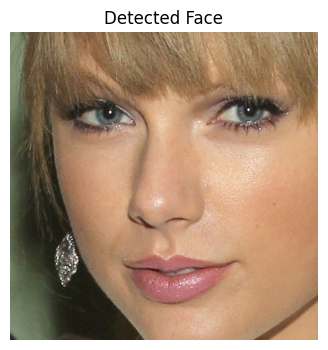

In [ ]:
# ===============================
# IMPORTS
# ===============================

import requests
import numpy as np
import cv2
import face_recognition
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO


# ===============================
# LOAD IMAGE FROM URL
# ===============================

image_url = "https://cdn.britannica.com/86/182086-050-5FB81069/singer-Taylor-swift-2013.jpg"

response = requests.get(image_url)
img_pil = Image.open(BytesIO(response.content)).convert("RGB")

# PIL (RGB) → NumPy
frame_rgb = np.array(img_pil)

# Convert RGB → BGR for OpenCV functions
frame_bgr = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)


# ===============================
# GOOD FRAME CHECK FUNCTIONS
# ===============================

def is_blurry(frame, threshold=100):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var < threshold


def is_too_dark(frame, threshold=40):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    return gray.mean() < threshold


def contains_face(frame_rgb):
    faces = face_recognition.face_locations(frame_rgb)
    return len(faces) > 0


def is_good_frame(frame_bgr):
    if frame_bgr is None or frame_bgr.size == 0:
        return False

    frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

    if not contains_face(frame_rgb):
        return False

    if is_blurry(frame_bgr):
        return False

    if is_too_dark(frame_bgr):
        return False

    return True


# ===============================
# TEST THE IMAGE
# ===============================

print("Is blurry       :", is_blurry(frame_bgr))
print("Is too dark     :", is_too_dark(frame_bgr))
print("Contains face   :", contains_face(frame_rgb))
print("GOOD FRAME ?    :", is_good_frame(frame_bgr))


# ===============================
# VISUALIZE DETECTED FACE
# ===============================

face_locations = face_recognition.face_locations(frame_rgb)

if len(face_locations) > 0:
    top, right, bottom, left = face_locations[0]
    face_crop = frame_rgb[top:bottom, left:right]

    plt.figure(figsize=(4, 4))
    plt.imshow(face_crop)
    plt.title("Detected Face")
    plt.axis("off")
    plt.show()
else:
    print("No face detected to display.")


In [ ]:
pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=2b148f9048b3403e5ba4aca31d4c2f0ba6aaa1af5c407ddfb1b2cfd227005688
  Stored in directory: /root/.cache/pip/wheels/8f/47/c8/f44c5aebb7507f7c8a2c0bd23151d732d0f0bd6884ad4ac635
Successfully built face-recognition-models
